<h1 style='color: black'>Задание №10. Численные методы - Метод касательных.</h1>

In [1]:
f = (2^sin(2*x) + arctan(2 * x))^2 - 8 * sin(x)
show(f)

(2^sin(2*x) + arctan(2*x))^2 - 8*sin(x)

$\text{Построим график функции.}$

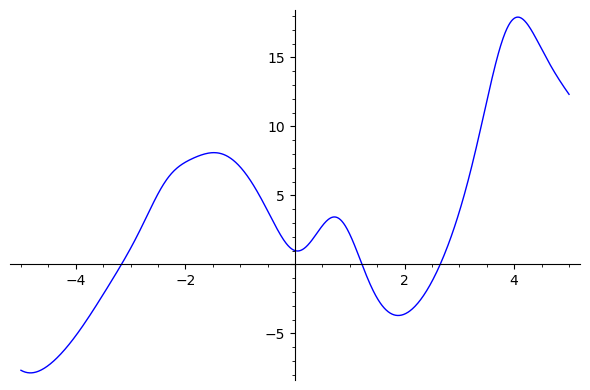

In [2]:
plot(f, xmin=-5, xmax=5)

In [13]:
EPS = 0.001
a = -10
b = -2
x0 = (a + b) /2
max_steps = 10
def newton(step):
    global a, b, EPS, f
    x1 = a
    x2 = (a + b)/2
    df = f.derivative()
    counter = 0
    while abs(f(x=x1) - f(x=x2)) >= EPS and counter < step:
        x1 = x2
        x2 = x1 - (f(x=x1)/df(x=x1)).n()
        while x2 > b or x2 < a:
            x2 = (x1 + x2)/2
        counter += 1
    pl = plot(f, a, b)
    pl += point((x1, f(x=x1)), color="red", size=30, zorder=10)
    show(pl)
    show(f"x_{counter} = ", x1)

In [4]:
@interact(step=(0, max_steps, 1))
def _(step=20):
    newton(step)

Interactive function <function _ at 0x7f80cbd4c550> with 1 widget
  step: IntSlider(value=10, description='ste…

Корень находится на 5 шаге алгоритма. Проверяем на сходимость

In [5]:
Fd = f.diff()
show(Fd)

4*(2^sin(2*x)*cos(2*x)*log(2) + 1/(4*x^2 + 1))*(2^sin(2*x) + arctan(2*x)) - 8*cos(x)

In [6]:
Fdd = Fd.diff()
show(Fdd)

8*(2^sin(2*x)*cos(2*x)*log(2) + 1/(4*x^2 + 1))^2 + 8*(2^sin(2*x)*cos(2*x)^2*log(2)^2 - 2^sin(2*x)*log(2)*sin(2*x) - 4*x/(4*x^2 + 1)^2)*(2^sin(2*x) + arctan(2*x)) + 8*sin(x)

In [7]:
show(f(a) * f(b))

((1/2^sin(20) - arctan(20))^2 + 8*sin(10))*((1/2^sin(4) - arctan(4))^2 + 8*sin(2))

Выражение не считатеся. Проверим пересекают ли производные 0 на отрезке

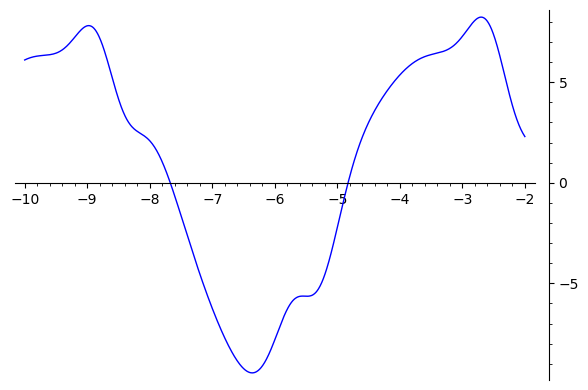

In [10]:
plot(Fd, a, b)

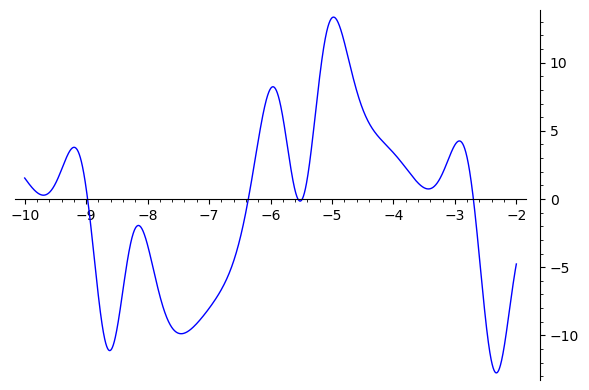

In [11]:
plot(Fdd, a, b)

Данный пункт не сходится. Проверим следующий

In [14]:
f(x0)*Fdd(x0)

8/21025*((145*cos(12)*log(2)/2^sin(12) + 1)^2 + (21025*cos(12)^2*log(2)^2/2^sin(12) + 21025*log(2)*sin(12)/2^sin(12) + 24)*(1/2^sin(12) - arctan(12)) - 21025*sin(6))*((1/2^sin(12) - arctan(12))^2 + 8*sin(6))

Таким образом данный метод не гарантирует сходимость на данном отрезке